# Interpolation

Given a discrete data set of the form $x_0, x_1, \ldots , x_n$ and $y_0, y_1, \ldots , y_n$, to determine a curve that passes through every point in the given data set and able to obtain the value of $y$ for a given value of $x$ as long as $x_0 \leq x \leq x_n$. Curve fitting is differnt in that the curve may or may not pass through all points of the data set.

## Polynomial Interpolation

### Lagrange's Method
$$P_n (x) = \sum_{i=0}^{n} y_i \, l_i(x)$$
where $n$ denotes the degree of the polynomial and $l_i(x)$ are the _cardinal functions_.
$$
\begin{align*}l_i(x) & = \frac{x - x_0}{x_i - x_0} \cdot \frac{x - x_1}{x_i - x_1} \cdots \frac{x - x_{i-1}}{x_i - x_{i-1}} \cdot \frac{x - x_{i+1}}{x_i - x_{i+1}} \cdots \frac{x - x_n}{x_i - x_n} \\
 & = \Pi_{j=0; j \neq i}^{n} \frac{x - x_j}{x_i - x_j}, \quad i=0, 1, \ldots , n
\end{align*}$$

If $n = 1$, the interpolant is a straight line $P_1(x) = y_0 \, l_0(x) + y_1 \, l_1(x)$, where
$$
\begin{align*}
l_0(x) & = \frac{x - x_1}{x_0 - x_1} & l_1(x) = \frac{x - x_0}{x_1 - x_0}
\end{align*}
$$

If $n = 2$, the interpolant is parabolic $P_2(x) = y_0 \, l_0(x) + y_1 \, l_1(x) + y_2 \, l_2(x)$, where
$$
\begin{align*}
l_0 (x) & = \frac{x - x_1}{x_0 - x_1} \cdot \frac{x - x_2}{x_0 - x_2} \\
l_1 (x) & = \frac{x - x_0}{x_1 - x_0} \cdot \frac{x - x_2}{x_0 - x_2} \\
l_2 (x) & = \frac{x - x_0}{x_1 - x_0} \cdot \frac{x - x_1}{x_2 - x_1}
\end{align*}
$$

Cardinal functions are polynomials of degree $n$, and have the property
$$
\begin{align*}
l_i(x_j) & = \begin{cases}
0 & \text{if } i \neq j \\
1 & \text{if } i = j
\end{cases}
\end{align*}
$$

In [54]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([0, 2, 3.0])
y = np.array([7, 11, 28.0])
print x
print y

def lagrange(x, y, xx):
    '''
    lagrange(x[0:m-1]:float, y[0:m-1]:float, xx:float) -> s:float
    
    x  - Data set
    y  - Data set
    xx - Value at which to calculate interpolant
    
    s  - Interpolant
    '''
    n = len(x)  # number of data points
    if len(y) != n:
        return None

    s = 0.0
    for i in range(n):
        p = 1.0
        for j in range(n):
            if i != j:
                p *= (xx - x[j]) / (x[i] - x[j])
        s += y[i] * p
    return s

xx = 1.0
yy = lagrange(x, y, xx)
print 'At x=', xx, 'y =', yy

[ 0.  2.  3.]
[  7.  11.  28.]
At x= 1.0 y = 4.0


### Newton's Divided Difference Method
$$P_n(x) = a_0 + (x - x_0) a_1 + (x - x_0)(x - x_1) a_2 + \cdots + (x - x_0)(x-x_1)( \cdots (x-x_n) a_n
$$
As an example, for four data points ($n=3$),
$$
\begin{align*}P_3(x) &= a_0 + (x-x_0) a_1 + (x-x_0)(x-x_1)a_2 + (x-x_0)(x-x_1)(x-x_2)a_3 \\
 & = a_0 + (x-x_0) \left\{ a_1 + (x-x_1) \left[ a_2 + (x-x_2) a_3 \right] \right\}
\end{align*}$$
This can be evaluated backwards with the following recurrence relations
$$
\begin{align*}
P_0(x) &= a_3 \\
P_1 &= a_2 + (x - x_2) P_0(x) \\
P_2(x) &= a_1 + (x - x_1) P_1(x) \\
P_3(x) &= a_0 + (x - x_0) P_2(x)
\end{align*}
$$
For arbitrary $n$, we have
$$
\begin{align*}
P_o(x) &= a_n \\
P_k(x) &= a_{n-k} + (x - x_{n-k}) P_{k-1}(x), \quad k = 1, 2, \ldots , n
\end{align*}
$$
The coefficients $a_i$ of $P_n$ can be obtained by forcing the polynomial to pass through each data point: $y_i = P_n(x_i), \quad i=0, 1, \ldots , n$. This yields the following simultaneous equations:
$$
\begin{align*}
y_0 &= a_0 \\
y_1 &= a_0 + (x_1 - x_0) a_1 \\
y_2 &= a_0 + (x_2 - x_0) a_1 + (x_2 - x_0)(x_2 - x_1) a_2 \\
& \vdots \\
y_n &= a_0 + (x_n - x_0) a_1 + \cdots + (x_n - x_0)(x_n - x_1) \cdots (x_n - x_{n-1}) a_n
\end{align*}
$$
Introducing dividd differences
$$
\begin{align*}
\nabla y_i &= \frac{y_i - y_0}{x_i - x_0}, \quad i=1, 2, \ldots , n \\
\nabla^2 y_i &= \frac{\nabla y_i - \nabla y_1}{x_i - x_1}, \quad i=2, 3, \ldots , n \\
\nabla^3 y_i &= \frac{\nabla^2 y_i - \nabla^2 y_2}{x_i - x_2}, \quad i=3, 4, \ldots , n \\
& \vdots \\
\nabla^n y_n &= \frac{\nabla^{n-1} y_n - \nabla^{n-1} y_{n-1}}{x_n - x_{n-1}}
\end{align*}
$$
The solution of the simultaneous equations is
$$
\begin{align*}
a_0 &= y_0 \\
a_1 &= \nabla y_1 \\
a_2 &= \nabla^2 y_2 \\
& \vdots \\
a_n &= \nabla^n y_n
\end{align*}
$$

In [55]:
def newton_coeff(x, y):
    '''
    newton_coeff(x[0:m-1]:float, y[0:m-1]:float) -> a[0:m-2]:float
    
    x - Data set
    y - Data set
    
    a - Newton coefficients
    '''
    m = len(x)
    if len(y) != m:
        return None
    a = y.copy()
    for k in range(1, m):
        a[k:m] = (a[k:m] - a[k-1]) / (x[k:m] - x[k-1])
    return a

def eval_poly(a, x, xx):
    '''
    eval_poly(a[0:n-1]:float, x[0:n]:float, xx:float) -> p:float
    
    a  - Newton coefficients for polynomial of order n
    x  - Data set
    xx - Value at which to evaluate the polynomial
    '''
    n = len(x) - 1  # Degree of polynomial
    p = a[n]
    for k in range(1, n+1):
        p = a[n-k] + (xx - x[n-k]) * p
    return p

x = np.array([-2, 1, 4, -1, 3, -4.0])
y = np.array([-1, 2, 59, 4, 24, -53.0])
print x
print y

a = newton_coeff(x, y)
print a
xx = 1.0
yy = eval_poly(a, x, xx)
print xx, yy

for xx in x:
    print xx, eval_poly(a, x, xx)
print 1.5, eval_poly(a, x, 1.5)

[-2.  1.  4. -1.  3. -4.]
[ -1.   2.  59.   4.  24. -53.]
[-1.  1.  3.  1.  0.  0.]
1.0 2.0
-2.0 -1.0
1.0 2.0
4.0 59.0
-1.0 4.0
3.0 24.0
-4.0 -53.0
1.5 3.375


When all you want to is to determine the interpolant at just one point, Lagrange's method serves the very well. However, when you want to determine the interpolant at several points for a given data set, Lagrane's method is inefficient. In such a scenario, Newton's method is appropriate as it calculates the coefficients for the given set of data once which can then be used any number of times to determine the interpolant at any number of desired points.

### Neville's Method
Neville's method is better suited when you want to determine the interpolant at only point.


In [56]:
def neville(x, y, xx):
    '''
    neville(x[0:m-1]:float, y[0:m-1]:float, xx:float) -> yy[0]float
    x  - Data set
    y  - Data set
    yy - Value at which to calculate interpolant
    
    y[0] - Interpolant
    '''
    m = len(x)
    yy = y.copy()
    for k in range(1, m):
        yy[0:m-k] = ((xx - x[k:m])*yy[0:m-k] + (x[0:m-k] - xx) * yy[1:m-k+1]) / (x[0:m-k] - x[k:m])
    return yy[0]

x = np.array([4, 3.9, 3.8, 3.7])
y = np.array([-0.06604, -0.02724, 0.01282, 0.05383])

x = neville(y, x, 0.0)  # Inverse interpolation
print 'y = 0 at x =', x

y = 0 at x = 3.83170355972


## Application
The population (in million) of a country from 1920 to 2000 is tabulated below. Fit a 7th order polynomial to the first 8 points (1920 to 1990). Use it to compute the population in 2000 by extrapolation and compare your prediction with the actual result. Repeat the solution by using first-, second-, third- and fourth-order interpolation in 2000 based on most recent data. That is, for the linear prediction use data from 1980 and 1990, for the quadratic predction use data from 1970, 1980 and 1990, and so on. Which approach yields the best result?
<table>
<tr>
<td><b>Year</b></td><td>1920</td><td>1930</td><td>1940</td><td>1950</td><td>1960</td><td>1970</td><td>1980</td><td>1990</td><td>2000</td>
</tr>
<tr>
<td><b>Population (million)</b></td><td>106.46</td><td>123.08</td><td>132.12</td><td>152.27</td><td>180.67</td><td>205.05</td><td>227.23</td><td>249.46</td><td>281.42</td>
</tr>
</table>

[1920 1930 1940 1950 1960 1970 1980 1990]
[ 106.46  123.08  132.12  152.27  180.67  205.05  227.23  249.46]


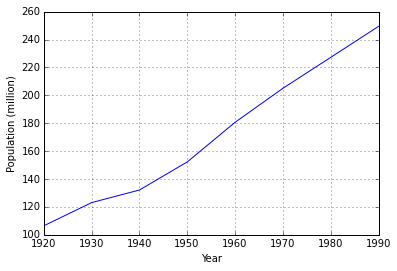

[ -61.93933898  -32.93559245  147.09772352   38.15651693 -115.35176345
    6.41561849  101.69337891  166.32345703]
175.08

Lagrange Interpolation
[1920 1930 1940 1950 1960 1970 1980 1990] 175.08
[1980 1990] 271.69
[1970 1980 1990] 271.74
[1960 1970 1980 1990] 273.99
[1950 1960 1970 1980 1990] 274.42
[1940 1950 1960 1970 1980 1990] 260.76

Newton Interpolation
[1920 1930 1940 1950 1960 1970 1980 1990] 175.08
[1980 1990] 271.69
[1970 1980 1990] 271.74
[1960 1970 1980 1990] 273.99
[1950 1960 1970 1980 1990] 274.42
[1940 1950 1960 1970 1980 1990] 260.76

Neville's Method
[1920 1930 1940 1950 1960 1970 1980 1990] 175.08
[1980 1990] 271.69
[1970 1980 1990] 271.74
[1960 1970 1980 1990] 273.99
[1950 1960 1970 1980 1990] 274.42
[1940 1950 1960 1970 1980 1990] 260.76


In [57]:
t = np.array(range(1920, 1991, 10))
print t
pop = np.array([106.46, 123.08, 132.12, 152.27, 180.67, 205.05, 227.23, 249.46])
p2000 = 281.42
print pop
plt.plot(t, pop)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Population (million)')
plt.show()


#p = np.polyfit(t, pop, 7)
#print p
ts = (t - 1955) / 35
p = np.polyfit(ts, pop, 7)
print p
pop2000 = np.polyval(p, (2000 - 1955) / 35)
print pop2000

print
print 'Lagrange Interpolation'
print t, lagrange(t, pop, 2000)
print t[-2:], lagrange(t[-2:], pop[-2:], 2000)
print t[-3:], lagrange(t[-3:], pop[-3:], 2000)
print t[-4:], lagrange(t[-4:], pop[-4:], 2000)
print t[-5:], lagrange(t[-5:], pop[-5:], 2000)
print t[-6:], lagrange(t[-6:], pop[-6:], 2000)

print
print 'Newton Interpolation'
a = newton_coeff(t, pop)
print t, eval_poly(a, t, 2000)

a = newton_coeff(t[-2:], pop[-2:])
print t[-2:], eval_poly(a, t[-2:], 2000)

a = newton_coeff(t[-3:], pop[-3:])
print t[-3:], eval_poly(a, t[-3:], 2000)

a = newton_coeff(t[-4:], pop[-4:])
print t[-4:], eval_poly(a, t[-4:], 2000)

a = newton_coeff(t[-5:], pop[-5:])
print t[-5:], eval_poly(a, t[-5:], 2000)

a = newton_coeff(t[-6:], pop[-6:])
print t[-6:], eval_poly(a, t[-6:], 2000)

print
print "Neville's Method"
print t, neville(t, pop, 2000)
print t[-2:], neville(t[-2:], pop[-2:], 2000)
print t[-3:], neville(t[-3:], pop[-3:], 2000)
print t[-4:], neville(t[-4:], pop[-4:], 2000)
print t[-5:], neville(t[-5:], pop[-5:], 2000)
print t[-6:], neville(t[-6:], pop[-6:], 2000)